In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
df = pd.read_csv('./../data/wineQT.csv')

In [3]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
694,7.7,0.39,0.12,1.70,0.097,19.0,27.0,0.99596,3.16,0.49,9.4,5,988
1072,6.2,0.44,0.39,2.50,0.077,6.0,14.0,0.99555,3.51,0.69,11.0,6,1503
483,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5,682
412,8.8,0.44,0.49,2.80,0.083,18.0,111.0,0.99820,3.30,0.60,9.5,5,577
264,9.1,0.28,0.48,1.80,0.067,26.0,46.0,0.99670,3.32,1.04,10.6,6,372


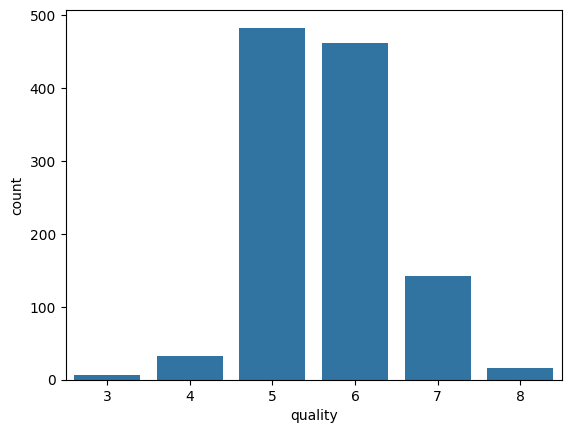

In [5]:
sns.countplot(x='quality', data=df)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
from sklearn.preprocessing import StandardScaler

cols = df.drop(['quality', 'Id'], axis=1).columns.to_list()
scaler = StandardScaler()
scaled = scaler.fit_transform(df[cols])

scaled_df = pd.DataFrame(scaled, columns=cols)
scaled_df['quality'] = df['quality']

In [9]:
X = scaled_df.drop('quality', axis=1).values
y = scaled_df['quality'].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### One vs All
- n classifiers for n classes data
- select the class which gives the highest confidnece score

In [38]:
from sklearn.linear_model import LogisticRegression

model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

/Users/user/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [39]:
from sklearn.metrics import accuracy_score

y_pred_ova = model_ova.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_ova):.2f}')

Accuracy: 0.65


#### One vs One
- n(n-1) / 2 classifiers are trained for n labels
- during prediction, the class is decided by voting

In [42]:
from sklearn.multiclass import OneVsOneClassifier

model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [44]:
y_pred_ovo = model_ovo.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_ovo):.2f}')

Accuracy: 0.63


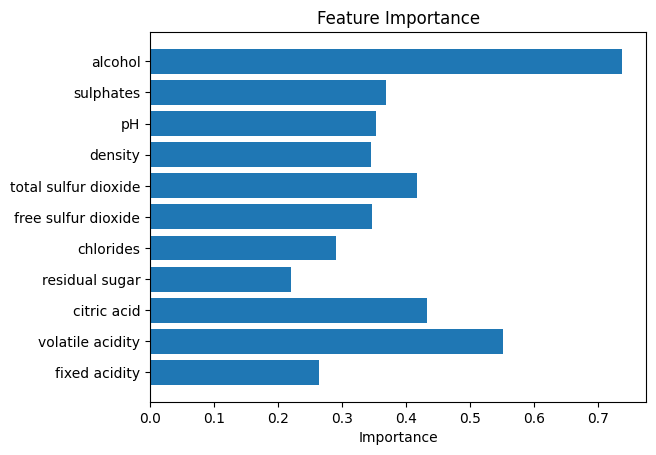

In [46]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(scaled_df.drop('quality', axis=1).columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()